# Solutions to the OG-UN-Training Exercises
### by Jason DeBacker and Richard W. Evans, 2023

In [12]:
# imports
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sys
import os
import ogcore
import ogusa
import json
import urllib

## Standard Library Chapter Exercises

1. Use the `sys` module to create a relative path from a Python module, print that path.

In [ ]:
# 1. Determine which of Python's built in objects (string, dict, list, tuple, set) are mutable and which are immutable.
a_string = "Alliteration"
try:
    a_string[0] = "B"
    print("Strings are mutable")
except TypeError:
    print("Strings are immutable")
a_dict = {"a": 1, "b": 2, "c": 3}
try:
    a_dict["a"] = 99
    # print("The new dictionary = ", a_dict)
    print("Dictionaries are mutable")
except TypeError:
    print("Dictionaries are immutable")
a_list = [1, 2, 3, 4, 5]
try:
    a_list[0] = 99
    # print("The new list =  ", a_list)
    print("Lists are mutable")
except TypeError:
    print("Lists are immutable")
a_set = {1, 2, 3, 4, 5}
try:
    a_set[0] = 99
    # print("The new set = ", a_set)
    print("Sets are mutable")
except TypeError:
    print("Sets are immutable")
a_tuple = (1, 2, 3, 4, 5)
try:
    a_tuple[0] = 99
    # print("The new tuple = ", a_tuple)
    print("Tuples are mutable")
except TypeError:
    print("Tuples are immutable")
an_int = 1
try:
    an_int = 99
    # print("The new int = ", an_int)
    print("Integers are mutable")
except TypeError:
    print("Integers are immutable")



In [ ]:
# 2. Create a python module that prints something (e.g. `Hello World!`) and run it from the command line using `python module_name.py`.
# 3. Create a python notebook and run it in VS Code

# Can't replicate these in a notebook


In [ ]:
# 4. Write a function that finds the Fibonacci sequence up to an integer `N` > 0 in the notebook.
# Now call this function for `N = 10` and `N=100`.
def fibo(N):
    assert N > 0  # raise error if N <= 0
    seq = [0]
    while seq[-1] <  N:
        if len(seq) == 1:
            seq.append(1)
        else:
            seq.append(seq[-1] + seq[-2])
    return seq[:-1]

print("Fibonacci series up to 10: ", fibo(10))
print("Fibonacci series up to 100: ", fibo(100))

In [ ]:
# 5. Use the `sys` module to create a relative path from a Python module, print that path.
print("The relative path is: ", sys.path[0])

## Object Oriented Programming Chapter Exercises

In [ ]:
# 1. Define a class called `Specifications` with an attribute that is the rate of time preference, $\beta$.
# Create instances of this class called `p1` for $\beta=0.96$ and `p2` $\beta=0.99$.

class Specifications:
    def __init__(self, beta):
        self.beta = beta

p = Specifications(0.96)
q = Specifications(0.99)
print("Two instances of the Specifications class with different parameterizations of beta: ", p.beta, q.beta)

In [ ]:
# 2. Update the `Specifications` class so that allows one to specify the
# value of $\beta$ upon initialization of the class and checks that $\beta$ is between 0 and 1.

class Specifications:
    def __init__(self, beta):
        assert 0 < beta < 1
        self.beta = beta
p = Specifications(0.96)
q = Specifications(0.99)
print("Two instances of the Specifications class with different parameterizations of beta: ", p.beta, q.beta)
# Try a beta out of range:
try:
    p3 = Specifications(1.01)
except AssertionError:
    print("Beta must be between 0 and 1")

In [ ]:
# 3. Modify the `Specifications` class so that it has a method that prints the value of $\beta$.

class Specifications:
    def __init__(self, beta):
        assert 0 < beta < 1
        self.beta = beta

    def print_beta(self):
        print("Beta = ", self.beta)

# Test this:
p = Specifications(0.96)
p.print_beta()


In [ ]:
# 4. Change the input of $\beta$ to the class so that it is input at an annual rate.
# Allow another attribute of the class called `S` that is the number of periods in
# an economic agent's life.  Include a method in the `Specifications` class that
# adjusts the value  the value of $\beta$ to represent the discount rate applied
# per model period, which will be equivalent to `S/80` years.

class Specifications:
    def __init__(self, beta_annual, S):
        assert 0 < beta_annual < 1
        self.beta_annual = beta_annual
        self.S = S

    def print_beta(self):
        print("Beta = ", self.beta_annual)

    def beta_adjust(self):
        self.beta = self.beta_annual ** (80 / self.S)

# Test this
p = Specifications(0.96, 80)
p.beta_adjust()
print("With" , p.S, "periods, Beta annual = ", p.beta_annual, " Beta per period = ", p.beta)
p2 = Specifications(0.96, 40)
p2.beta_adjust()
print("With" , p2.S, "periods, Beta annual = ", p2.beta_annual, " Beta per period = ", p2.beta)
p3 = Specifications(0.96, 10)
p3.beta_adjust()
print("With" , p3.S, "periods, Beta annual = ", p3.beta_annual, " Beta per period = ", p3.beta)

In [ ]:
# 5. Add a method to the `Specifications` class that allows one to update the
# values of the class attributes `S` and `beta_annual` by providing a
# dictionary of the form `{"S": 40, "beta_annual": 0.8}`.
# Ensure that when the instance is updated, the new `beta` attribute is
# consistent with the new `S` and `beta_annual`.

class Specifications:
    def __init__(self, beta_annual, S):
        assert 0 < beta_annual < 1
        self.beta_annual = beta_annual
        self.S = S

    def print_beta(self):
        print("Beta = ", self.beta_annual)

    def beta_adjust(self):
        self.beta = self.beta_annual ** (80 / self.S)

    def update(self, new_dict):
        for key, value in new_dict.items():
            setattr(self, key, value)
        self.beta_adjust()

# Test this
p = Specifications(0.96, 80)
p.beta_adjust()
print("With" , p.S, "periods, Beta annual = ", p.beta_annual, " Beta per period = ", p.beta)
p.update({"S": 40, "beta_annual": 0.8})
print("With" , p.S, "periods, Beta annual = ", p.beta_annual, " Beta per period = ", p.beta)

## Numpy Chapter Excercies   


In [ ]:
# 1. Create a matrix b
b = np.array([[1.1, 2.2, 3.0, 2.0, 1.0], [3.3, 4.4, 5.0, 3.7, 2.0]])
print("b = ", b)
print("b.shape = ", b.shape)
# Use the `shape` method of Numpy arrays to print the shape of this matrix.
# Use array slicing to print the first row of `b`, which represents the
# lifecycle savings decisions of the first agent (i.e., the amount they
# choose to save in each of their 5 periods of life).  Use array slicing
# to print the second column of `b`, which is the saves of both agents
# when they are in their second period of life.  Finally, use array
# slicing to print the first two rows and the last three columns of `b`
# (i.e., the savings of both agents from middle age onwards).
print("First row of b = ", b[0, :])
print("Second column of b = ", b[:, 1])
print("First two rows and last three columns of b = ", b[0:2, 2:5])

In [ ]:
# 2. Define `Omega` and compute the dot product of b and the transpose of Omega
Omega = np.array([[0.05, 0.05, 0.08, 0.06, 0.2], [0.12, 0.16, 0.03, 0.2, 0.05]])
B = np.dot(b, Omega.T)
print("B = ", B)
print("The diagonal elements of B have some meaning.\n " +
      "The top left is the total savings of all type 1 agents (across cohorts).\n " +
      "The bottom right is the total savings of all type 2 agents (across cohorts).\n " +
      "The off-diagonal elements of B have no meaning since these are the \n " +
      "sum of one types savings with another types weights.")

In [ ]:
# 3. Multiply the matrix `b` by the matrix `Omega` element-wise (Hadamard product).  Use the `np.array.sum()` method on the resulting matrix to find the total savings of each cohort.
C = b * Omega
print("Savings by cohort = ", C.sum(axis=0))

In [ ]:
# 3. In one line, create a matrix of zeros that is the same size as `b`.
b_zeros = np.zeros_like(b)
print("Matrix of zeros like b = ", b_zeros)

In [ ]:
# 4. Use `np.where` to return the elements of `b` that are greater than 2.0 and zero elsewhere.
b_gt2 = np.where(b > 2.0, b, b_zeros)
print("Indices of elements of b that are greater than 2.0 = ", b_gt2)
print(b_gt2.shape)

In [ ]:
# 5. Now suppose a 3rd type of agent.
# This agent has savings $b_3 = \[4.1, 5.1, 7.1, 4.5, 0.9]$.
# Use `np.vstack` to stack `b` on top of `b_3` to create a new matrix `b_new`.
b_3 = np.array([4.1, 5.1, 7.1, 4.5, 0.9])
b_new = np.vstack((b, b_3))
print("New b matrix with 3 types of agents = ", b_new)

## Pandas Chapter Exercises

In [28]:
# 1. Creat a dataframe from a dictionary
gdppc_dict = {
    "Year": [1990, 2000, 2010, 2018],
    "IND": [2087, 2753, 4526, 6806],
    "MYS": [8179, 13475, 18574, 24842],
    "USA": [36982, 45886, 49267, 55335],
}
df = pd.DataFrame(gdppc_dict)
print(df)

   Year   IND    MYS    USA
0  1990  2087   8179  36982
1  2000  2753  13475  45886
2  2010  4526  18574  49267
3  2018  6806  24842  55335


In [29]:
# 2. Inspect this data frame.  Print `df.head(3)`.  Print `df.tail(3)`.
# Get a list of column names with the `keys` method.
#Finally, use the  `describe` method to print descriptive statistics.
print("DataFrame head = ", df.head(3))
print("DataFrame tail = ", df.tail(3))
print("DataFrame column names = ", df.keys())
print("DataFrame descriptive statistics = ", df.describe())

DataFrame head =     Year   IND    MYS    USA
0  1990  2087   8179  36982
1  2000  2753  13475  45886
2  2010  4526  18574  49267
DataFrame tail =     Year   IND    MYS    USA
1  2000  2753  13475  45886
2  2010  4526  18574  49267
3  2018  6806  24842  55335
DataFrame column names =  Index(['Year', 'IND', 'MYS', 'USA'], dtype='object')
DataFrame descriptive statistics =                Year          IND           MYS           USA
count     4.000000     4.000000      4.000000      4.000000
mean   2004.500000  4043.000000  16267.500000  46867.500000
std      12.151817  2110.094311   7119.547762   7662.519364
min    1990.000000  2087.000000   8179.000000  36982.000000
25%    1997.500000  2586.500000  12151.000000  43660.000000
50%    2005.000000  3639.500000  16024.500000  47576.500000
75%    2012.000000  5096.000000  20141.000000  50784.000000
max    2018.000000  6806.000000  24842.000000  55335.000000


In [30]:
# 3. Pandas DataFrame use an index to keep track of rows.
# Not the default index in `df` are integers for each row.
# Let's change the index so the year is the index value. Print the updated DataFrame.
df = df.set_index("Year")
print("DataFrame with year as index = ", df)

DataFrame with year as index =         IND    MYS    USA
Year                    
1990  2087   8179  36982
2000  2753  13475  45886
2010  4526  18574  49267
2018  6806  24842  55335


In [31]:
# 4. Let's reshape this into a long panel format with a `MultiIndex` for the columns.
# The first level of the `MultiIndex` should be the year and the second level should be the country.
# The values should be the GDP per capita.  To do this, use the pivottable. Print the DataFrame.
df = pd.DataFrame(df.stack())
# name the country index
df = df.rename_axis(index=("Year", "Country"))
df.rename(columns={df.columns[0]:"GDP per capita"}, inplace=True)
df

GDP per capita
Year Country                
1990 IND                2087
     MYS                8179
     USA               36982
2000 IND                2753
     MYS               13475
     USA               45886
2010 IND                4526
     MYS               18574
     USA               49267
2018 IND                6806
     MYS               24842
     USA               55335

In [32]:
# 5. Create a new variable that is the GDP growth rate from the prior period measure.
# Using `groupby` to find mean GDP growth rate for each country ove the sample.
df["GDP pc Growth"] = df["GDP per capita"].groupby("Country").pct_change()
print("DataFrame with GDP growth = ", df)

DataFrame with GDP growth =                GDP per capita  GDP pc Growth
Year Country                               
1990 IND                2087            NaN
     MYS                8179            NaN
     USA               36982            NaN
2000 IND                2753       0.319118
     MYS               13475       0.647512
     USA               45886       0.240766
2010 IND                4526       0.644025
     MYS               18574       0.378404
     USA               49267       0.073683
2018 IND                6806       0.503756
     MYS               24842       0.337461
     USA               55335       0.123166


In [33]:
# 6. Print a DataFrame as a table (e.g. to tex or json or md)
print(df.reset_index().to_markdown(index=False))

|   Year | Country   |   GDP per capita |   GDP pc Growth |
|-------:|:----------|-----------------:|----------------:|
|   1990 | IND       |             2087 |     nan         |
|   1990 | MYS       |             8179 |     nan         |
|   1990 | USA       |            36982 |     nan         |
|   2000 | IND       |             2753 |       0.319118  |
|   2000 | MYS       |            13475 |       0.647512  |
|   2000 | USA       |            45886 |       0.240766  |
|   2010 | IND       |             4526 |       0.644025  |
|   2010 | MYS       |            18574 |       0.378404  |
|   2010 | USA       |            49267 |       0.0736826 |
|   2018 | IND       |             6806 |       0.503756  |
|   2018 | MYS       |            24842 |       0.337461  |
|   2018 | USA       |            55335 |       0.123166  |


In [ ]:
# 7. Read in a csv file as a DataFrame.
url = "https://raw.githubusercontent.com/EAPD-DRB/OG-ZAF/main/ogzaf/data/demographic/un_zaf_pop.csv"
df = pd.read_csv(url, sep="|",  header=1)
print(df.head(n=5))

In [ ]:
# 8. Keep only the rows and columns that you need.
zaf_pop = df.loc[(df.TimeLabel == 2021) & (df.SexId == 3), ["AgeStart", "Value"]]
print(zaf_pop.head(n=5))

In [ ]:
# 9. Rename column and create a density variable
zaf_pop.rename(columns={"Value": "Count"}, inplace=True)
zaf_pop["Density"] = zaf_pop.Count / zaf_pop.Count.sum()
print(zaf_pop.head(n=5))


In [ ]:
# 10. Use the `plot` method to plot the population density across age for South Africa.
zaf_pop.plot(x="AgeStart", y="Density", title="South Africa Population Density by Age", xlabel="Age", ylabel="Density")

In [ ]:
# 11. Create a data from that has the population density of women and then merge that to `zaf_pop`. Plot the distributions across age overall and for women
df = pd.read_csv(url, sep="|",  header=1)
zaf_female_pop = df.loc[(df.TimeLabel == 2021) & (df.SexId == 2), ["AgeStart", "Value"]]
zaf_female_pop.rename(columns={"Value": "Female Count"}, inplace=True)
zaf_female_pop["Female Density"] = zaf_female_pop["Female Count"] / zaf_female_pop["Female Count"].sum()
zaf_pop = zaf_pop.merge(zaf_female_pop, on="AgeStart", how="inner")
zaf_pop.plot(x="AgeStart", y=["Density", "Female Density"], title="South Africa Population Density by Age and Gender", xlabel="Age", ylabel="Density")

In [ ]:
# 12. Save your final DataFrame to disk as a csv file.
zaf_pop.to_csv("zaf_pop.csv", index=False)

# Matplotlib Chapter Exercises


<Axes: title={'center': 'Mean GDP per capita by country'}, xlabel='Country', ylabel='GDP per capita'>

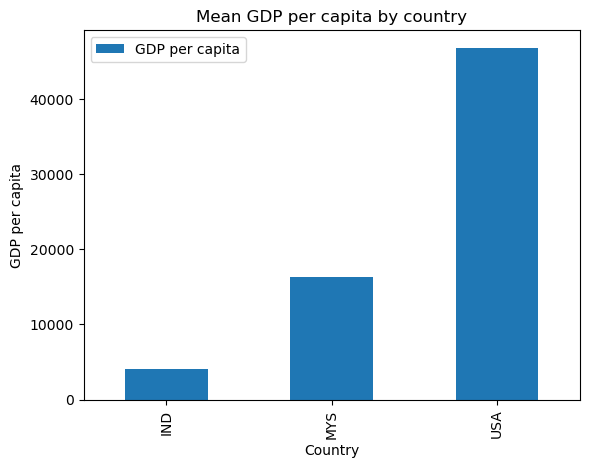

In [37]:
# Exercise 8.4: Bar plot with mean GDP by country
df.reset_index(inplace=True)
df_country = df.groupby("Country").mean().reset_index()
df_country.plot.bar(x="Country", y="GDP per capita", title="Mean GDP per capita by country", xlabel="Country", ylabel="GDP per capita")

<Axes: title={'center': 'Mean GDP per capita by country and year'}, xlabel='Country', ylabel='GDP per capita'>

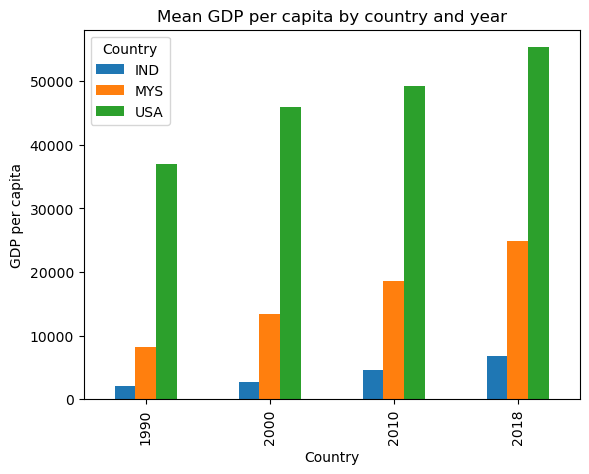

In [40]:
# Exercise 8.5: Grouped bar plot with mean GDP by country and year
# probably easiest to do this by pivoting the data
df_country_year = df.pivot(index="Year", columns="Country", values="GDP per capita")
df_country_year.plot.bar(title="Mean GDP per capita by country and year", xlabel="Country", ylabel="GDP per capita")

# Scipy Chapter Exercises

In [ ]:
# Scipy constraints optimization problem
# Trying to plot this in 2D, not very successfully
delta = 0.005
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 * Y
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
# circle = lambda x: np.sqrt(1 - x**2)
# plt.plot(x, circle(x), label="Constraint")
ax.plot(np.cos(x), np.sin(x), linewidth=1)
plt.show()

In [ ]:

circle = lambda x: np.sqrt(1 - x**2)
def z_func(x):
    return -x[0]**2 * x[1]
min_val = scipy.optimize.minimize(z_func, x0=[0.5, 0.5], bounds=[(-1, 1), (-1, 1)], constraints={"type": "eq", "fun": lambda x: x[0]**2 + x[1]**2 - 1})
print("Maximum value is: ", min_val["x"])

In [ ]:
y = np.sqrt(1/3)
x = np.sqrt(2) * y
print("Maximum value found by hand is: ", [x, y])

In [ ]:
# Scipy interpolation problem
x_full = np.linspace(-10, 10, 100)
y_full = np.sin(x_full)
plt.plot(x_full, y_full)
plt.show()

In [ ]:
random_index = np.random.choice(np.arange(100), size=40, replace=False)
x = x_full[random_index]
y = y_full[random_index]
plt.scatter(x, y)

In [ ]:
# interpolate function y = f(x)
y_hat = scipy.interpolate.interp1d(x, y, kind="cubic", fill_value="extrapolate")
plt.plot(x_full, y_hat(x_full))

# Simulating OG-Core Chapter Exercises

In [ ]:
# SS simulation of change in corporate income tax:
# set paths to save output to
CUR_PATH = os.path.abspath("")#os.path.abspath(os.path.dirname(__file__))
baseline_dir = os.path.join(CUR_PATH, "Exercise_Simulations", "OUTPUT_BASELINE")
reform_dir = os.path.join(CUR_PATH, "Exercise_Simulations", "OUTPUT_REFORM")

# solve for baseline SS
p = ogcore.parameters.Specifications(
    output_base=baseline_dir,
    baseline=True,
)
ogcore.execute.runner(p, time_path=False)

p_reform = ogcore.parameters.Specifications(
    output_base = reform_dir,
    baseline_dir=baseline_dir,
    baseline = False,
)
# Solve for reform SS after changing the corporate income tax rate to 15%
p_reform.update_specifications({'cit_rate': [[0.15]]})
ogcore.execute.runner(p_reform, time_path=False)

In [ ]:
# Compare output by looking at a table of macro aggregates
base_ss =ogcore.utils.safe_read_pickle(os.path.join(baseline_dir, "SS", "SS_vars.pkl"))
reform_ss = ogcore.utils.safe_read_pickle(os.path.join(reform_dir, "SS", "SS_vars.pkl"))
macro_table = ogcore.output_tables.macro_table_SS(base_ss, reform_ss)
print(macro_table.to_markdown())

# OG-Core Output Exercises

In [ ]:
# Exercise 17.1: solve for SS with different betas, plot SS profiles
# set paths to save output to
CUR_PATH = os.path.abspath("")#os.path.abspath(os.path.dirname(__file__))
baseline_dir = os.path.join(CUR_PATH, "Exercise_Simulations", "OUTPUT_BASELINE")
reform_dir = os.path.join(CUR_PATH, "Exercise_Simulations", "OUTPUT_REFORM")

# solve for baseline SS
p = ogcore.parameters.Specifications(
    output_base=baseline_dir,
    baseline=True,
)
ogcore.execute.runner(p, time_path=False)

p_reform = ogcore.parameters.Specifications(
    output_base = reform_dir,
    baseline_dir=baseline_dir,
    baseline = False,
)
# Solve for reform SS after changing the corporate income tax rate to 15%
p_reform.update_specifications({'beta_annual': [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]})
ogcore.execute.runner(p_reform, time_path=False)

In [ ]:
base_ss =ogcore.utils.safe_read_pickle(os.path.join(baseline_dir, "SS", "SS_vars.pkl"))
reform_ss = ogcore.utils.safe_read_pickle(os.path.join(reform_dir, "SS", "SS_vars.pkl"))
base_params = ogcore.utils.safe_read_pickle(os.path.join(baseline_dir, "model_params.pkl"))
reform_params = ogcore.utils.safe_read_pickle(os.path.join(reform_dir, "model_params.pkl"))
ogcore.output_plots.ss_profiles(base_ss, base_params, reform_ss, reform_params)

In [ ]:
# Exercise 17.2
from io import BytesIO
import pickle
import requests
tpi_path = "https://github.com/PSLmodels/OG-Core/blob/master/tests/test_io_data/TPI_vars_baseline.pkl"
ss_path = "https://github.com/PSLmodels/OG-Core/blob/master/tests/test_io_data/SS_vars_baseline.pkl"
model_params_path = "https://github.com/PSLmodels/OG-Core/blob/master/tests/test_io_data/model_params_baseline.pkl"
r = requests.get(tpi_path)
tpi_output = pickle.loads(BytesIO(r.content).getvalue())
r = requests.get(ss_path)
ss_output = pickle.loads(BytesIO(r.content).getvalue())
r = requests.get(model_params_path)
model_params = pickle.loads(BytesIO(r.content).getvalue())

GDP_stationary_model_units = tpi_output["Y"]
T_vec = np.arange(0, tpi_output["Y"].shape[0])
GDP_non_stationary_model_units = GDP_stationary_model_units * np.exp(model_params["g_y"] * T_vec) * np.cumprod(1 + model_params["g_n"])
GDP_non_stationary_local_currency = GDP_non_stationary_model_units * ss_output["factor_ss"]
# plot GDP in local currency
plt.plot(GDP_non_stationary_local_currency)

In [ ]:
# 17.3: Create macro tables
# First, read in model output
base_tpi_path = "https://github.com/PSLmodels/OG-Core/blob/master/tests/test_io_data/TPI_vars_baseline.pkl"
base_params_path = "https://github.com/PSLmodels/OG-Core/blob/master/tests/test_io_data/model_params_baseline.pkl"
reform_tpi_path = "https://github.com/PSLmodels/OG-Core/blob/master/tests/test_io_data/TPI_vars_reform.pkl"
reform_params_path = "https://github.com/PSLmodels/OG-Core/blob/master/tests/test_io_data/model_params_reform.pkl"
r = requests.get(base_tpi_path)
base_tpi = pickle.loads(BytesIO(r.content).getvalue())
r = requests.get(base_params_path)
base_params = pickle.loads(BytesIO(r.content).getvalue())
r = requests.get(reform_tpi_path)
reform_tpi = pickle.loads(BytesIO(r.content).getvalue())
r = requests.get(reform_params_path)
reform_params = pickle.loads(BytesIO(r.content).getvalue())

In [ ]:
# Now make the macro table
macro_table = ogcore.output_tables.macro_table_TPI(base_tpi, reform_tpi, base_params, reform_params)
print(macro_table.to_markdown())

In [ ]:
# 17.4, Plot aggregates
ogcore.output_plots.macro_aggregates(base_tpi, reform_tpi, base_params, reform_params)

In [ ]:
# 17.5, Plot aggregates relative to a baseline forecast
GDP_forecast = np.array([
    9798433.361, 9787825.404, 10132595.93, 10411531.32,
    10830994.35,11121729.09,11541296.74,12054563.71,
    12594777.57,13193437.33,13737993.55,13875146.34,
    14116809.36,14520719.97,15072347.37,15601870.36,16047299.44,
    16348375.08,16326046.51,15911894.12,16319838.19,16572931.77,
    16945747.72,17257902.13,17693831.73,18238008.17,18550137.99,
    18982853.58,19551667.62,19974213.89,19277860.06,20600684.21,
    21333157.94,21745600,22089590,22435530,22795090,23165430,23542450,
    23922220,24302080,24680650,25057260,25432210,25805950,26178950,
    26551860,26925870,27301970,27680920,28063300,28449620,28840510,
    29236180,29636360,30040560,30448430,30860520,31276660,31696400,
    32119290,32545110,32973750,33405240,33839410,34276180,34715910,
    35159850,35609030,36064460,36527240
])
ogcore.output_plots.macro_aggregates(
    base_tpi, reform_tpi, base_params,
    reform_params, plot_type="forecast", forecast_data=GDP_forecast)

# Calibration Chapter Exercises

In [ ]:
# 1. Create a utility to get population data from the UN Population Prospects for a country of interest to you.
# The solution is to replace the `country_id` value of "710" with the number that is appropriate for your country (as a string)

In [ ]:
# Exercise 18.2: Plot fertility rates for the country of interest
import ogzaf.demographics as demog  # change this to module created in (1)

fert_rates = demog.get_fert(100, download=True)
plt.plot(np.arange(0, 100), fert_rates)

In [ ]:
# 18.3. Plot mortality rates for the country of interest
mort_rates, inf_mort_rate = demog.get_mort(100, download=True)
# graph saved in folder in working directory
plt.plot(np.arange(0, 100), mort_rates)

In [ ]:
# 18.4: Return the population objects dictionary and plot the population distribution over several years
E = 20
S = 80
T = 320
curr_year = 2023
pop_objs = demog.get_pop_objs(E, S, T, curr_year, download=True)
# plots
pop_dist = pop_objs["omega"]
ages = np.linspace(20, 101, 80)
years = [0, 20, 100, 319]  # just use indexes here
for y in years:
    plt.plot(ages, pop_dist[y, :], label=2023 + y)
plt.legend()
plt.show()

In [ ]:
# 18.5: Plot the population growth rate over time
years = np.linspace(1, T+1, T)
plt.plot(years, pop_objs["g_n"][:T])

# Then some description of the population growth rate rising or falling because fertility rates are high and mortality low (or vice versa)

In [ ]:
# Exercise 18.6: Simulation with alternative demographics
# set paths to save output to
base_dir = os.path.join(CUR_PATH, "Exercise_Simulations", "OUTPUT_BASELINE")
reform_dir = os.path.join(CUR_PATH, "Exercise_Simulations", "OUTPUT_REFORM")
# baseline parameterization
p = Specifications(
    baseline=True,
    baseline_dir=base_dir,
    output_base=base_dir,
)
ogcore.execute.runner(p, time_path=False)
# "reform" parameterization
p2 = Specifications(
        baseline=False,
        baseline_dir=base_dir,
        output_base=reform_dir,
    )
pop_objs_dict = demog.get_pop_objs(p2.E, p2.S, p2.T, p2.start_year, download=True)
p2.update_specifications(pop_objs_dict)
ogcore.execute.runner(p2, time_path=False)

In [ ]:
# now compare output
base_ss = ogcore.utils.safe_read_pickle(os.path.join(base_dir, "SS", "SS_vars.pkl"))
reform_ss = ogcore.utils.safe_read_pickle(os.path.join(reform_dir, "SS", "SS_vars.pkl"))
macro_table = ogcore.output_tables.macro_table_SS(base_ss, reform_ss)
print(macro_table.to_markdown())

In [ ]:
# Exercise 18.7: Using pandas data reader
import pandas_datareader as pdr
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 1, 1)
# FRED code for Real GDP in South Africa is NGDPRSAXDCZAQ
gdp = pdr.data.DataReader("NGDPRSAXDCZAQ", "fred", start, end)
# plot this series
plt.plot(gdp)

In [ ]:
# Exercise 18.8: Turn this quarterly data into annual data
# First, get the annual average
gdp_annual = gdp.resample('Y').mean()
# plot this series
plt.plot(gdp_annual)

In [ ]:
# Exercise 18.9: Plot the annual growth rate of GDP
gdp_growth = gdp_annual.pct_change()
gdp_growth = gdp_growth.dropna()
plt.plot(gdp_growth)

In [ ]:
# Exercise 18.10: Estimate the autocorrelation of the annual growth rate of GDP
import statsmodels.regression.linear_model as lm
reg_model = lm.OLS(gdp_growth[1:].values, gdp_growth[:-1].values)
reg_results = reg_model.fit()
print(reg_results.summary())

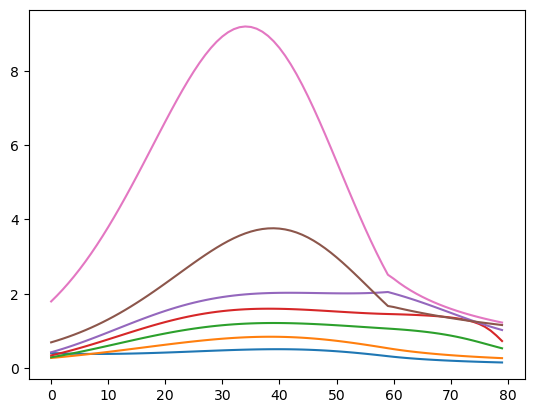

In [6]:
# Excercise 18.12: Plot earnings profies from ogusa
from ogusa import income
p = ogcore.parameters.Specifications()
e = income.get_e_interp(p.S, p.omega_SS, p.omega_SS, p.lambdas, plot=False)
for j in np.arange(p.J):
    plt.plot(e[:, j])
plt.show()

In [20]:
# Exercise 18.13: Adjust earnings matrix to fit any gini
def gen_new_emat(E, S, J, lambdas, age_wgts, gini_to_match=35.7, plot=False):
    """
    This function takes the calibrated lifetime earnings profiles
    (abilities, e matrix) from OG-USA and then adjusts the shape of those
    profiles to match the Gini coefficient for another economy. The
    Gini coefficient to match is given in the argument gini_to_match.
    Note that the calibrated OG-USA e matrix is of size (80, 10), where
    80 is the number of ages and 10 is the number of ability types.
    Users of this function specify their own number of age groups (S)
    and ability types (J). The function will map the fitted functions
    into these dimensions so long as the percentiles of the ability types
    given in lambdas is not more refined at the top end than those in
    OG-USA (which identifies up to the top 0.1%).

    Args:
        E (int): the age agents become economically active
        S (int): number of ages to interpolate. This method assumes that
            ages are evenly spaced between the beginning of age E
            up to E+S, >= 3
        J (int): number of ability types to interpolate
        lambdas (Numpy array): distribution of population in each
            ability group, length J
        age_wgts (Numpy array): distribution of population in each age
            group, length S
        gini_to_match (float): Gini coefficient to match, default is
            35.7, the Gini coefficient for India in 2019
        plot (bool): if True, creates plots of emat_orig and the new
            interpolated emat_new

    Returns:
        emat_new_scaled (Numpy array): interpolated ability matrix scaled
            so that population-weighted average is 1, size SxJ

    """
    assert lambdas.shape[0] == J
    assert age_wgts.shape[0] == S
    # Load USA e matrix as a baseline
    usa_params = ogcore.parameters.Specifications()
    usa_params.update_specifications(
        json.load(
            urllib.request.urlopen(
                "https://raw.githubusercontent.com/PSLmodels/OG-USA/master/ogusa/ogusa_default_parameters.json"
            )
        )
    )

    # Define a function that will find the "a" in the equation:
    # e_Y = e_USA * exp(a * e_USA)
    # such that the e_Y produces a gini coefficient in the model that
    # gives the same ratio between the model implied Gini's in the USA
    # and the target country and the empirical Gini's in the USA and given
    # by gin_to_match for the target country
    def f(
        a,
        emat_orig,
        age_wgts,
        abil_wgts,
        gini_to_match,
        gini_usa_data,
        gini_usa_model,
    ):
        gini_target_model = ogcore.utils.Inequality(
            emat_orig * np.exp(a * emat_orig),
            age_wgts,
            abil_wgts,
            len(age_wgts),
            len(abil_wgts),
        ).gini()
        error = (gini_to_match / gini_usa_data) - (
            gini_target_model / gini_usa_model
        )
        return error

    # Note, USA gini in the World Bank data is 41.5
    # See https://data.worldbank.org/indicator/SI.POV.GINI
    gini_usa_data = 41.5
    # Find the model implied Gini for the USA
    gini_usa_model = ogcore.utils.Inequality(
        usa_params.e,
        usa_params.omega_SS,
        usa_params.lambdas,
        usa_params.S,
        usa_params.J,
    ).gini()

    x = scipy.optimize.root_scalar(
        f,
        args=(
            usa_params.e,
            usa_params.omega_SS,
            usa_params.lambdas,
            gini_to_match,
            gini_usa_data,
            gini_usa_model,
        ),
        method="bisect",
        bracket=[-1, 1],
        xtol=1e-10,
    )
    a = x.root
    e_new = usa_params.e * np.exp(a * usa_params.e)
    emat_new_scaled = (
        e_new
        / (
            e_new
            * usa_params.omega_SS.reshape(usa_params.S, 1)
            * usa_params.lambdas.reshape(1, usa_params.J)
        ).sum()
    )

    return emat_new_scaled

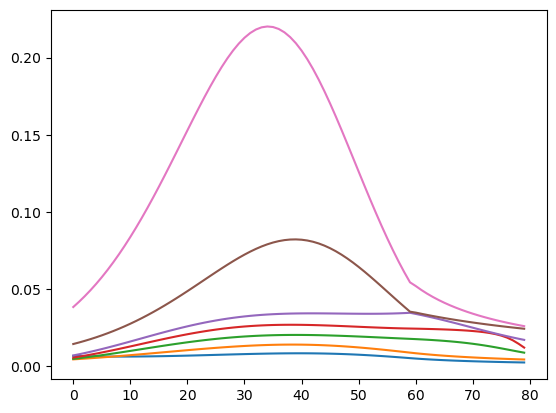

In [27]:
e_new = gen_new_emat(p.E, p.S, p.J, p.lambdas, p.omega_SS, gini_to_match=85.7, plot=True)
for j in np.arange(p.J):
    plt.plot(e_new[:, j])
plt.show()